# Automatic Approach to Calculate Displacement & Throw on Thrust Faults 
## *Real-world Applications*

## A Case Study on coalmines dataset from Ruhr coalfield in the lower Rhine basin, Germany.  

***By: Ramy Abdallah***

![Chevron folds](https://i.imgur.com/VS2Qj9D.jpg)

## Introduction

Our case study comes from part of the Ruhr coalfield in the Lower Rhine Basin, Germany (Drozdzewski 1993). Strata of Namurian and Westphalian age are deformed into a series of folds and thrusts that accommodate contractional tectonics along the northern margin of the Variscan orogenic system (e.g. Wrede 2005). These successions contain numerous coal seams that have been exploited by extensive deep-mining. It is the richness of direct subsurface observations, through the mine workings, along with the level of structural complexity that challenges geological interpretation, that motivates our study.

The data used in our study come from an extensive report by Drozdzewski et al. (1980) on part of the Ruhr coalfield (Fig. 1). The mine-workings (galleries, adits and shafts) along with associated boreholes and seismic reflection profiles provide subsurface information, supported by surface exposure enhanced by open-cast pits. Collectively these observational resources allow interpretation of the subsurface geological structure to a depth of 2 km over a 323.29 km2 area. Drozdzewski et al. (1980) report these observations and erect their own geological interpretations on a series of paper maps and cross-sections. Cross-section spacing is at 1 to 2 km, resulting in a set of 12 serial cross-sections, with two tying cross-lines (see the following fig). Critically, Drozdzewski et al. (1980) also indicate levels of confidence in their interpretations using descriptive criteria.

The cross-section used in this study is cross-section number 5 from the Ruhr coalfield, lower Rhine basin, Germany. The cross-section was digitised manually using Move structural software and exported as a data file to be used in the Python ecosystem.

![Thrust Faults Structures](https://i.imgur.com/Bn7cm2t.jpg)

## Objective

The main objective of this notebook is to apply the intuitive new approach that we develop in the previous notebooks to calculate the displacement and throw from a 2D subsurface cross-section from the Ruhr coalmine, Germany. This study proves that the Python script developed and tested on synthetic models can be applied for real-world cross-sections and used for production.

## Data

The 2D subsurface models used in this notebook are in data format (.dat) and generated from the digitised cross-section number 5, where we calculated the displacement and throw on the cross-section and applied the generated workflow in the previous cross-sections.

## Libraries

In this study we are going to use mainly `math` libarary.

This package allows access to the standard's mathematical functions. For more information see https://docs.python.org/3/library/math.html#module-math

In [1]:
import csv
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

sns.set()
%matplotlib notebook

## Project Generalised Workflow

>1. **Load, read and explore the data**
>2. **Visualised the cross-section model**
>3. **Displacement and throw calculation on cross-section 5 model**
>4. **Summarize inferences & write a conclusion**

## Methods

### 1. Load, read and explore the data

### Download the 2D Geological Models as Data files

We read, explore, clean and visualise the subsurface model that we want to calculate the displacement and throw. For a detailed explanation, please read the 2D and 3D visualisation notebooks. We will start by the fault data points then we will resume to the horizons data.

#### Fault data points

In [2]:
filepath = r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\section5_structure_model_222_15012020.dat'

with open(filepath, "r") as file:  
    lines = file.readlines()

In [3]:
print("Number of lines:", len(lines), "\n")
print("first 5 lines:\n")
lines[:5]

Number of lines: 1261 

first 5 lines:



['350456.6366\t5706406.7966\t-87.8852\tFault1-5-29\n',
 '350478.0276\t5706378.7303\t-102.7436\tFault1-5-29\n',
 '350532.4334\t5706307.3468\t-140.5343\tFault1-5-29\n',
 '350537.2661\t5706301.0061\t-144.3919\tFault1-5-29\n',
 '350575.4939\t5706248.1305\t-175.9631\tFault1-5-29\n']

Here we iterate over every line and strip away the \n from the right of the string

In [4]:
for i, line in enumerate(lines):  
    lines[i] = line.rstrip("\n")  
    
lines[:5]

['350456.6366\t5706406.7966\t-87.8852\tFault1-5-29',
 '350478.0276\t5706378.7303\t-102.7436\tFault1-5-29',
 '350532.4334\t5706307.3468\t-140.5343\tFault1-5-29',
 '350537.2661\t5706301.0061\t-144.3919\tFault1-5-29',
 '350575.4939\t5706248.1305\t-175.9631\tFault1-5-29']

Similarly, we create a loop to iterate over fault data and strip out the character “\t”

In [5]:
count_faults = []  
for line in lines: 
    line_values = line.split("\t")  
                                   
    for count_fault in line_values: 
        count_faults.append((count_fault))

We have five faults segments in our dataset. Let count each data point in each fault segment and separate them in the next step.

In [6]:
print(count_faults.count('Fault1-5-29'))
print(count_faults.count('Fault1-5-30'))
print(count_faults.count('Fault1-5-33'))
print(count_faults.count('Fault1-5-37'))
print(count_faults.count('Fault1-5-39'))

67
26
13
18
5


Then we index the data points to get the points for each fault segment.

In [7]:
fault_29_grid = lines[:67]
fault_30_grid = lines[67:93]
fault_33_grid = lines[93:106]
fault_37_grid = lines[106:124]
fault_39_grid = lines[124:129]

After that we create a for loop to clean the data points by striping the fault name, "\t", "''", " ".

Drop the name.

In [8]:
for i, line in enumerate(fault_29_grid):  
    fault_29_grid[i] = line.rstrip("tFault1-5-29")

Clean "\t".

In [9]:
xyzfault_29_values = []  
for line in fault_29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzfault_29_values.append(format(xyz_value)) 

Clean "''"

In [10]:
for i, line in enumerate(xyzfault_29_values):  
    xyzfault_29_values[i] = line.rstrip("''")
    
for i, line in enumerate(xyzfault_29_values):  
    xyzfault_29_values[i] = line.strip()

Clean ''

In [11]:
ztt = []
for i in xyzfault_29_values:
    if i != '':
        ztt.append(i)

Clean " "

In [12]:
xyz_f29_values = []  
for line in ztt:  
    line_values = line.split(" ")  
    
    for xyz_value in line_values: 
        xyz_f29_values.append(float(xyz_value)) 

Then let us get the x, y and z data and store them in a separate list.

In [13]:
xyz_f29_values
f29_x = xyz_f29_values[::3]
f29_y = xyz_f29_values[1::3]
f29_z = xyz_f29_values[2::3]

Later we apply the same preparation to other faults in the dataset.

In [14]:
for i, line in enumerate(fault_30_grid):  
    fault_30_grid[i] = line.rstrip("tFault1-5-30")
    
for i, line in enumerate(fault_33_grid):  
    fault_33_grid[i] = line.rstrip("tFault1-5-33")
    
for i, line in enumerate(fault_37_grid):  
    fault_37_grid[i] = line.rstrip("tFault1-5-37")    
    
for i, line in enumerate(fault_39_grid):  
    fault_39_grid[i] = line.rstrip("tFault1-5-39")    

In [15]:
xyzfault_30_values = []  
for line in fault_30_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzfault_30_values.append(format(xyz_value))
        
xyzfault_33_values = []  
for line in fault_33_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzfault_33_values.append(format(xyz_value))
        
xyzfault_37_values = []  
for line in fault_37_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzfault_37_values.append(format(xyz_value))

xyzfault_39_values = []  
for line in fault_39_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzfault_39_values.append(format(xyz_value))

In [16]:
ztt_30 = []
for i in xyzfault_30_values:
    if i != '':
        ztt_30.append(i) 
        
ztt_33 = []
for i in xyzfault_33_values:
    if i != '':
        ztt_33.append(i) 
        
ztt_37 = []
for i in xyzfault_37_values:
    if i != '':
        ztt_37.append(i) 

ztt_39 = []
for i in xyzfault_39_values:
    if i != '':
        ztt_39.append(i) 

In [17]:
xyz_f30_values = []  
for line in ztt_30:  
    line_values = line.split(" ")  
    
    for xyz_value in line_values: 
        xyz_f30_values.append(float(xyz_value)) 

xyz_f33_values = []  
for line in ztt_33:  
    line_values = line.split(" ")  
    
    for xyz_value in line_values: 
        xyz_f33_values.append(float(xyz_value)) 

xyz_f37_values = []  
for line in ztt_37:  
    line_values = line.split(" ")  
    
    for xyz_value in line_values: 
        xyz_f37_values.append(float(xyz_value)) 

xyz_f39_values = []  
for line in ztt_39:  
    line_values = line.split(" ")  
    
    for xyz_value in line_values: 
        xyz_f39_values.append(float(xyz_value))      

In [18]:
xyz_f30_values
f30_x = xyz_f30_values[::3]
f30_y = xyz_f30_values[1::3]
f30_z = xyz_f30_values[2::3]

xyz_f33_values
f33_x = xyz_f33_values[::3]
f33_y = xyz_f33_values[1::3]
f33_z = xyz_f33_values[2::3]

xyz_f37_values
f37_x = xyz_f37_values[::3]
f37_y = xyz_f37_values[1::3]
f37_z = xyz_f37_values[2::3]

xyz_f39_values
f39_x = xyz_f39_values[::3]
f39_y = xyz_f39_values[1::3]
f39_z = xyz_f39_values[2::3]

#### Horizons data points

On the horizons datapoints we apply the same workflow that we adopt on the faults datapoints. For the horizons datapoints we need to split the data of the Hanging wall "HW from the footwall "FW" data points in order to calculate the throw or the dispalcement.

In [19]:
filepath = r'C:\Users\r04ra18\Desktop\fault-dataset\final-notebooks\data\section5_smh_hwfw_16012020.dat'

with open(filepath, "r") as file:  
    lines_hz = file.readlines()

In [20]:
print("Number of lines:", len(lines_hz), "\n")
print("first 5 lines:\n")
lines_hz[:5]

Number of lines: 1133 

first 5 lines:



['x\ty\tz\tName\n',
 '351033.1964\t5705615.0505\t-621.0671\tDi_hw29\n',
 '351033.1964\t5705615.0505\t-621.0671\tDi_hw29\n',
 '351036.3700\t5705610.6608\t-612.6657\tDi_hw29\n',
 '351046.8313\t5705596.1911\t-617.3645\tDi_hw29\n']

In [21]:
for i, line in enumerate(lines_hz):  
    lines_hz[i] = line.rstrip("\n")  
    
lines_hz[:5]

['x\ty\tz\tName',
 '351033.1964\t5705615.0505\t-621.0671\tDi_hw29',
 '351033.1964\t5705615.0505\t-621.0671\tDi_hw29',
 '351036.3700\t5705610.6608\t-612.6657\tDi_hw29',
 '351046.8313\t5705596.1911\t-617.3645\tDi_hw29']

We start cleaning the horizons data by dropping the names of the faults.

In [22]:
Di_hw29_grid = []  
for line in lines_hz:  
    if '\tDi_hw29' in line:
        Di_hw29_grid.append(line)
        
Di_hw30_grid = []  
for line in lines_hz:  
    if '\tDi_hw30' in line:
        Di_hw30_grid.append(line)

Gi5_hw29_grid = []  
for line in lines_hz:  
    if '\tGi5_hw29' in line:
        Gi5_hw29_grid.append(line)
        
Fi_hw29_grid = []  
for line in lines_hz:  
    if '\tFi_hw29' in line:
        Fi_hw29_grid.append(line)
        
Sb_hw29_grid = []  
for line in lines_hz:  
    if '\tSb_hw29' in line:
        Sb_hw29_grid.append(line)

Ma_fw29_grid = []  
for line in lines_hz:  
    if '\tMa_fw29' in line:
        Ma_fw29_grid.append(line)

Ma_fw37_grid = []  
for line in lines_hz:  
    if '\tMa_fw37' in line:
        Ma_fw37_grid.append(line)

Hu_fw37_grid = []  
for line in lines_hz:  
    if '\tHu_fw37' in line:
        Hu_fw37_grid.append(line)
        
Sb_hw29_grid = []  
for line in lines_hz:  
    if '\tSb_hw29' in line:
        Sb_hw29_grid.append(line)
        
Hu_fw37_grid = []  
for line in lines_hz:  
    if '\tHu_fw37' in line:
        Hu_fw37_grid.append(line)
        
Hu_fw29_grid = []  
for line in lines_hz:  
    if '\tHu_fw29' in line:
        Hu_fw29_grid.append(line)
        
Ka_fw29_grid = []  
for line in lines_hz:  
    if '\tKa_fw29' in line:
        Ka_fw29_grid.append(line)
        
Ka_hw29_grid = []  
for line in lines_hz:  
    if '\tKa_hw29' in line:
        Ka_hw29_grid.append(line)
        
ER_fw29_grid = []  
for line in lines_hz:  
    if '\tER_fw29' in line:
        ER_fw29_grid.append(line)
        
Er_hw29_grid = []  
for line in lines_hz:  
    if '\tEr_hw29' in line:
        Er_hw29_grid.append(line)
        
Pr_hw30_grid = []  
for line in lines_hz:  
    if '\tPr_hw30' in line:
        Pr_hw30_grid.append(line)
        
Mg_hw29_grid = []  
for line in lines_hz:  
    if '\tMg_hw29' in line:
        Mg_hw29_grid.append(line)

In [23]:
Di_fw29_grid = []  
for line in lines_hz:  
    if '\tDi_fw29' in line:
        Di_fw29_grid.append(line)
        
So_fw29_grid = []  
for line in lines_hz:  
    if '\tSo_fw29' in line:
        So_fw29_grid.append(line)

Gi5_fw29_grid = []  
for line in lines_hz:  
    if '\tGi5_fw29' in line:
        Gi5_fw29_grid.append(line)
        
Pr_fw29_grid = []  
for line in lines_hz:  
    if '\tPr_fw29' in line:
        Pr_fw29_grid.append(line)
        
Fi_fw29_grid = []  
for line in lines_hz:  
    if '\tFi_fw29' in line:
        Fi_fw29_grid.append(line)
        
Mg_fw29_grid = []  
for line in lines_hz:  
    if '\tMg_fw29' in line:
        Mg_fw29_grid.append(line)
        
Sb_fw29_grid = []  
for line in lines_hz:  
    if '\tSb_fw29' in line:
        Sb_fw29_grid.append(line)
        
Hf_grid = []  
for line in lines_hz:  
    if '\tHf' in line:
        Hf_grid.append(line)
        
Hu_hw29_grid = []  
for line in lines_hz:  
    if '\tHu_hw29' in line:
        Hu_hw29_grid.append(line)
        
La_fw29_grid = []  
for line in lines_hz:  
    if '\tLa_fw29' in line:
        La_fw29_grid.append(line)
        
Gu_fw37_grid = []  
for line in lines_hz:  
    if '\tGu_fw37' in line:
        Gu_fw37_grid.append(line)
        
Gufw29_grid = []  
for line in lines_hz:  
    if '\tGufw29' in line:
        Gufw29_grid.append(line)
        
Ma_hw29_grid = []  
for line in lines_hz:  
    if '\tMa_hw29' in line:
        Ma_hw29_grid.append(line)

Er_fw33_grid = []  
for line in lines_hz:  
    if '\tEr_fw33' in line:
        Er_fw33_grid.append(line)
        
Ka_fw33_grid = []  
for line in lines_hz:  
    if '\tKa_fw33' in line:
        Ka_fw33_grid.append(line)
        
Fi_hw39_grid = []  
for line in lines_hz:  
    if '\tFi_hw39' in line:
        Fi_hw39_grid.append(line)
        
Gi5_hw30_grid = []  
for line in lines_hz:  
    if '\tGi5_hw30' in line:
        Gi5_hw30_grid.append(line)
        
So_hw29_grid = []  
for line in lines_hz:  
    if '\tSo_hw29' in line:
        So_hw29_grid.append(line)
        
So_hw30_grid = []  
for line in lines_hz:  
    if '\tSo_hw30' in line:
        So_hw30_grid.append(line)

In [24]:
Pr_hw29_grid = []  
for line in lines_hz:  
    if '\tPr_hw29' in line:
        Pr_hw29_grid.append(line)
        
Er_hw30_grid = []  
for line in lines_hz:  
    if '\tEr_hw30' in line:
        Er_hw30_grid.append(line)
        
Zo8_fw29_grid = []  
for line in lines_hz:  
    if '\tZo8_fw29' in line:
        Zo8_fw29_grid.append(line)
        
Zo8_hw29_grid = []  
for line in lines_hz:  
    if '\tZo8_hw29' in line:
        Zo8_hw29_grid.append(line)
        
La_hw29_grid = []  
for line in lines_hz:  
    if '\tLa_hw29' in line:
        La_hw29_grid.append(line)
        
Gu_hw29_grid = []  
for line in lines_hz:  
    if '\tGu_hw29' in line:
        Gu_hw29_grid.append(line)
        
Ka_hw30_grid = []  
for line in lines_hz:  
    if '\tKa_hw30' in line:
        Ka_hw30_grid.append(line)
        
Wb_grid = []  
for line in lines_hz:  
    if '\tWb' in line:
        Wb_grid.append(line)

In the following lines we clean the data points and store the "x", "y" and "z" on a speparate lists.

In [25]:
for i, line in enumerate(Di_hw29_grid):  
    Di_hw29_grid[i] = line.rstrip("\tDi_hw29")

In [26]:
for i, line in enumerate(Di_hw30_grid):  
    Di_hw30_grid[i] = line.rstrip("\tDi_hw30")

In [27]:
for i, line in enumerate(Gi5_hw29_grid):  
    Gi5_hw29_grid[i] = line.rstrip("\tGi5_hw29")

In [28]:
for i, line in enumerate(Fi_hw29_grid):  
    Fi_hw29_grid[i] = line.rstrip("\tFi_hw29")

In [29]:
for i, line in enumerate(Sb_hw29_grid):  
    Sb_hw29_grid[i] = line.rstrip("\tSb_hw29")

In [30]:
for i, line in enumerate(Ma_hw29_grid):  
    Ma_hw29_grid[i] = line.rstrip("\tMa_hw29")

In [31]:
for i, line in enumerate(Ma_fw29_grid):  
    Ma_fw29_grid[i] = line.rstrip("\tMa_fw29")

In [32]:
for i, line in enumerate(Ma_fw37_grid):  
    Ma_fw37_grid[i] = line.rstrip("\tMa_fw37")

In [33]:
for i, line in enumerate(Hu_fw37_grid):  
    Hu_fw37_grid[i] = line.rstrip("\tHu_fw37")

In [34]:
for i, line in enumerate(Hu_fw29_grid):  
    Hu_fw29_grid[i] = line.rstrip("\tHu_fw29")

In [35]:
for i, line in enumerate(Ka_fw29_grid):  
    Ka_fw29_grid[i] = line.rstrip("\tKa_fw29")

In [36]:
for i, line in enumerate(Ka_hw29_grid):  
    Ka_hw29_grid[i] = line.rstrip("\tKa_hw29")

In [37]:
for i, line in enumerate(ER_fw29_grid):  
    ER_fw29_grid[i] = line.rstrip("\tER_fw29")

In [38]:
for i, line in enumerate(Er_hw29_grid):  
    Er_hw29_grid[i] = line.rstrip("\tEr_hw29")

In [39]:
for i, line in enumerate(Pr_hw30_grid):  
    Pr_hw30_grid[i] = line.rstrip("\tPr_hw30")

In [40]:
for i, line in enumerate(Mg_hw29_grid):  
    Mg_hw29_grid[i] = line.rstrip("\tMg_hw29")

In [41]:
for i, line in enumerate(Di_fw29_grid):  
    Di_fw29_grid[i] = line.rstrip("\tDi_fw29")

In [42]:
for i, line in enumerate(So_fw29_grid):  
    So_fw29_grid[i] = line.rstrip("\tSo_fw29")

In [43]:
for i, line in enumerate(Gi5_fw29_grid):  
    Gi5_fw29_grid[i] = line.rstrip("\tGi5_fw29")

In [44]:
for i, line in enumerate(Pr_fw29_grid):  
    Pr_fw29_grid[i] = line.rstrip("\tPr_fw29")

In [45]:
for i, line in enumerate(Fi_fw29_grid):  
    Fi_fw29_grid[i] = line.rstrip("\tFi_fw29")

In [46]:
for i, line in enumerate(Mg_fw29_grid):  
    Mg_fw29_grid[i] = line.rstrip("\tMg_fw29")

In [47]:
for i, line in enumerate(Sb_fw29_grid):  
    Sb_fw29_grid[i] = line.rstrip("\tSb_fw29")

In [48]:
for i, line in enumerate(Hf_grid):  
    Hf_grid[i] = line.rstrip("\tHf")

In [49]:
for i, line in enumerate(Hu_hw29_grid):  
    Hu_hw29_grid[i] = line.rstrip("\tHu_hw29")

In [50]:
for i, line in enumerate(La_fw29_grid):  
    La_fw29_grid[i] = line.rstrip("\tLa_fw29")

In [51]:
for i, line in enumerate(Gu_fw37_grid):  
    Gu_fw37_grid[i] = line.rstrip("\tGu_fw37")

In [52]:
for i, line in enumerate(Gufw29_grid):  
    Gufw29_grid[i] = line.rstrip("\tGufw29")

In [53]:
for i, line in enumerate(Ma_hw29_grid):  
    Ma_hw29_grid[i] = line.rstrip("\tMa_hw29")

In [54]:
for i, line in enumerate(Er_fw33_grid):  
    Er_fw33_grid[i] = line.rstrip("\tEr_fw33")

In [55]:
for i, line in enumerate(Ka_fw33_grid):  
    Ka_fw33_grid[i] = line.rstrip("\tKa_fw33")

In [56]:
for i, line in enumerate(Fi_hw39_grid):  
    Fi_hw39_grid[i] = line.rstrip("\tFi_hw39")

In [57]:
for i, line in enumerate(Gi5_hw30_grid):  
    Gi5_hw30_grid[i] = line.rstrip("\tGi5_hw30")

In [58]:
for i, line in enumerate(So_hw29_grid):  
    So_hw29_grid[i] = line.rstrip("\tSo_hw29")

In [59]:
for i, line in enumerate(So_hw30_grid):  
    So_hw30_grid[i] = line.rstrip("\tSo_hw30")

In [60]:
for i, line in enumerate(Pr_hw29_grid):  
    Pr_hw29_grid[i] = line.rstrip("\tPr_hw29")

In [61]:
for i, line in enumerate(Er_hw30_grid):  
    Er_hw30_grid[i] = line.rstrip("\tEr_hw30")

In [62]:
for i, line in enumerate(Zo8_fw29_grid):  
    Zo8_fw29_grid[i] = line.rstrip("\tZo8_fw29")

In [63]:
for i, line in enumerate(Zo8_hw29_grid):  
    Zo8_hw29_grid[i] = line.rstrip("\tZo8_hw29")

In [64]:
for i, line in enumerate(La_hw29_grid):  
    La_hw29_grid[i] = line.rstrip("\tLa_hw29")

In [65]:
for i, line in enumerate(Gu_hw29_grid):  
    Gu_hw29_grid[i] = line.rstrip("\tGu_hw29")

In [66]:
for i, line in enumerate(Ka_hw30_grid):  
    Ka_hw30_grid[i] = line.rstrip("\tKa_hw30")

In [67]:
for i, line in enumerate(Wb_grid):  
    Wb_grid[i] = line.rstrip("\tWb")

In [68]:
xyzDi_hw29_values = []  
for line in Di_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzDi_hw29_values.append(float(xyz_value))

In [69]:
xyzDi_hw29_values
Di_hw29_x = xyzDi_hw29_values[::3]
Di_hw29_y = xyzDi_hw29_values[1::3]
Di_hw29_z = xyzDi_hw29_values[2::3]

In [70]:
xyzDi_hw30_values = []  
for line in Di_hw30_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzDi_hw30_values.append(float(xyz_value))

In [71]:
xyzDi_hw29_values
Di_hw30_x = xyzDi_hw30_values[::3]
Di_hw30_y = xyzDi_hw30_values[1::3]
Di_hw30_z = xyzDi_hw30_values[2::3]

In [72]:
xyzGi5_hw29_values = []  
for line in Gi5_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzGi5_hw29_values.append(float(xyz_value))

In [73]:
xyzDi_hw29_values
Gi5_hw29_x = xyzGi5_hw29_values[::3]
Gi5_hw29_y = xyzGi5_hw29_values[1::3]
Gi5_hw29_z = xyzGi5_hw29_values[2::3]

In [74]:
xyzFi_hw29_values = []  
for line in Fi_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzFi_hw29_values.append(float(xyz_value))

In [75]:
xyzFi_hw29_values
Fi_hw29_x = xyzFi_hw29_values[::3]
Fi_hw29_y = xyzFi_hw29_values[1::3]
Fi_hw29_z = xyzFi_hw29_values[2::3]

In [76]:
xyzSb_hw29_values = []  
for line in Sb_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzSb_hw29_values.append(float(xyz_value))

In [77]:
xyzSb_hw29_values
Sb_hw29_x = xyzSb_hw29_values[::3]
Sb_hw29_y = xyzSb_hw29_values[1::3]
Sb_hw29_z = xyzSb_hw29_values[2::3]

In [78]:
xyzMa_fw29_values = []  
for line in Ma_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzMa_fw29_values.append(float(xyz_value))

In [79]:
xyzMa_fw29_values
Ma_fw29_x = xyzMa_fw29_values[::3]
Ma_fw29_y = xyzMa_fw29_values[1::3]
Ma_fw29_z = xyzMa_fw29_values[2::3]

In [80]:
xyzMa_fw37_values = []  
for line in Ma_fw37_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzMa_fw37_values.append(float(xyz_value))

In [81]:
xyzMa_fw37_values
Ma_fw37_x = xyzMa_fw37_values[::3]
Ma_fw37_y = xyzMa_fw37_values[1::3]
Ma_fw37_z = xyzMa_fw37_values[2::3]

In [82]:
xyzHu_fw37_values = []  
for line in Hu_fw37_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzHu_fw37_values.append(float(xyz_value))

In [83]:
xyzHu_fw37_values
Hu_fw37_x = xyzHu_fw37_values[::3]
Hu_fw37_y = xyzHu_fw37_values[1::3]
Hu_fw37_z = xyzHu_fw37_values[2::3]

In [84]:
xyzHu_fw29_values = []  
for line in Hu_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzHu_fw29_values.append(float(xyz_value))

In [85]:
xyzHu_fw29_values
Hu_fw29_x = xyzHu_fw29_values[::3]
Hu_fw29_y = xyzHu_fw29_values[1::3]
Hu_fw29_z = xyzHu_fw29_values[2::3]

In [86]:
xyzKa_fw29_values = []  
for line in Ka_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzKa_fw29_values.append(float(xyz_value))

In [87]:
xyzKa_fw29_values
Ka_fw29_x = xyzKa_fw29_values[::3]
Ka_fw29_y = xyzKa_fw29_values[1::3]
Ka_fw29_z = xyzKa_fw29_values[2::3]

In [88]:
xyzKa_hw29_values = []  
for line in Ka_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzKa_hw29_values.append(float(xyz_value))

In [89]:
xyzKa_hw29_values
Ka_hw29_x = xyzKa_hw29_values[::3]
Ka_hw29_y = xyzKa_hw29_values[1::3]
Ka_hw29_z = xyzKa_hw29_values[2::3]

In [90]:
xyzER_fw29_values = []  
for line in ER_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzER_fw29_values.append(float(xyz_value))

In [91]:
xyzER_fw29_values
ER_fw29_x = xyzER_fw29_values[::3]
ER_fw29_y = xyzER_fw29_values[1::3]
ER_fw29_z = xyzER_fw29_values[2::3]

In [92]:
xyzEr_hw29_values = []  
for line in Er_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzEr_hw29_values.append(float(xyz_value))

In [93]:
xyzEr_hw29_values
Er_hw29_x = xyzEr_hw29_values[::3]
Er_hw29_y = xyzEr_hw29_values[1::3]
Er_hw29_z = xyzEr_hw29_values[2::3]

In [94]:
xyzPr_hw30_values = []  
for line in Pr_hw30_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzPr_hw30_values.append(float(xyz_value))

In [95]:
xyzPr_hw30_values
Pr_hw30_x = xyzPr_hw30_values[::3]
Pr_hw30_y = xyzPr_hw30_values[1::3]
Pr_hw30_z = xyzPr_hw30_values[2::3]

In [96]:
xyzHf_values = []  
for line in Hf_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzHf_values.append(float(xyz_value))

In [97]:
xyzHf_values
Hf_x = xyzHf_values[::3]
Hf_y = xyzHf_values[1::3]
Hf_z = xyzHf_values[2::3]

In [98]:
xyzWb_values = []  
for line in Wb_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzWb_values.append(float(xyz_value))

In [99]:
xyzWb_values
Wb_x = xyzWb_values[::3]
Wb_y = xyzWb_values[1::3]
Wb_z = xyzWb_values[2::3]

In [100]:
xyzMg_hw29_values = []  
for line in Mg_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzMg_hw29_values.append(float(xyz_value))

In [101]:
xyzMg_hw29_values
Mg_hw29_x = xyzMg_hw29_values[::3]
Mg_hw29_y = xyzMg_hw29_values[1::3]
Mg_hw29_z = xyzMg_hw29_values[2::3]

In [102]:
xyzDi_fw29_values = []  
for line in Di_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzDi_fw29_values.append(float(xyz_value))

In [103]:
xyzDi_fw29_values
Di_fw29_x = xyzDi_fw29_values[::3]
Di_fw29_y = xyzDi_fw29_values[1::3]
Di_fw29_z = xyzDi_fw29_values[2::3]

In [104]:
xyzSo_fw29_values = []  
for line in So_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzSo_fw29_values.append(float(xyz_value))

In [105]:
xyzSo_fw29_values
So_fw29_x = xyzSo_fw29_values[::3]
So_fw29_y = xyzSo_fw29_values[1::3]
So_fw29_z = xyzSo_fw29_values[2::3]

In [106]:
xyzGi5_fw29_values = []  
for line in Gi5_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzGi5_fw29_values.append(float(xyz_value))

In [107]:
xyzGi5_fw29_values
Gi5_fw29_x = xyzGi5_fw29_values[::3]
Gi5_fw29_y = xyzGi5_fw29_values[1::3]
Gi5_fw29_z = xyzGi5_fw29_values[2::3]

In [108]:
xyzPr_fw29_values = []  
for line in Pr_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzPr_fw29_values.append(float(xyz_value))

In [109]:
xyzPr_fw29_values
Pr_fw29_x = xyzPr_fw29_values[::3]
Pr_fw29_y = xyzPr_fw29_values[1::3]
Pr_fw29_z = xyzPr_fw29_values[2::3]

In [110]:
xyzFi_fw29_values = []  
for line in Fi_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzFi_fw29_values.append(float(xyz_value))

In [111]:
xyzFi_fw29_values
Fi_fw29_x = xyzFi_fw29_values[::3]
Fi_fw29_y = xyzFi_fw29_values[1::3]
Fi_fw29_z = xyzFi_fw29_values[2::3]

In [112]:
xyzMg_fw29_values = []  
for line in Mg_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzMg_fw29_values.append(float(xyz_value))

In [113]:
xyzMg_fw29_values
Mg_fw29_x = xyzMg_fw29_values[::3]
Mg_fw29_y = xyzMg_fw29_values[1::3]
Mg_fw29_z = xyzMg_fw29_values[2::3]

In [114]:
xyzSb_fw29_values = []  
for line in Sb_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzSb_fw29_values.append(float(xyz_value))

In [115]:
xyzSb_fw29_values
Sb_fw29_x = xyzSb_fw29_values[::3]
Sb_fw29_y = xyzSb_fw29_values[1::3]
Sb_fw29_z = xyzSb_fw29_values[2::3]

In [116]:
xyzHu_hw29_values = []  
for line in Hu_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzHu_hw29_values.append(float(xyz_value))

In [117]:
xyzHu_hw29_values
Hu_hw29_x = xyzHu_hw29_values[::3]
Hu_hw29_y = xyzHu_hw29_values[1::3]
Hu_hw29_z = xyzHu_hw29_values[2::3]

In [118]:
xyzLa_fw29_values = []  
for line in La_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzLa_fw29_values.append(float(xyz_value))

In [119]:
xyzLa_fw29_values
La_fw29_x = xyzLa_fw29_values[::3]
La_fw29_y = xyzLa_fw29_values[1::3]
La_fw29_z = xyzLa_fw29_values[2::3]

In [120]:
xyzGu_fw37_values = []  
for line in Gu_fw37_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzGu_fw37_values.append(float(xyz_value))

In [121]:
xyzGu_fw37_values
Gu_fw37_x = xyzGu_fw37_values[::3]
Gu_fw37_y = xyzGu_fw37_values[1::3]
Gu_fw37_z = xyzGu_fw37_values[2::3]

In [122]:
xyzGufw29_values = []  
for line in Gufw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzGufw29_values.append(float(xyz_value))

In [123]:
xyzGufw29_values
Gufw29_x = xyzGufw29_values[::3]
Gufw29_y = xyzGufw29_values[1::3]
Gufw29_z = xyzGufw29_values[2::3]

In [124]:
xyzMa_hw29_values = []  
for line in Ma_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzMa_hw29_values.append(float(xyz_value))

In [125]:
xyzMa_hw29_values
Ma_hw29_x = xyzMa_hw29_values[::3]
Ma_hw29_y = xyzMa_hw29_values[1::3]
Ma_hw29_z = xyzMa_hw29_values[2::3]

In [126]:
xyzEr_fw33_values = []  
for line in Er_fw33_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzEr_fw33_values.append(float(xyz_value))

In [127]:
xyzEr_fw33_values
Er_fw33_x = xyzEr_fw33_values[::3]
Er_fw33_y = xyzEr_fw33_values[1::3]
Er_fw33_z = xyzEr_fw33_values[2::3]

In [128]:
xyzKa_fw33_values = []  
for line in Ka_fw33_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzKa_fw33_values.append(float(xyz_value))

In [129]:
xyzKa_fw33_values
Ka_fw33_x = xyzKa_fw33_values[::3]
Ka_fw33_y = xyzKa_fw33_values[1::3]
Ka_fw33_z = xyzKa_fw33_values[2::3]

In [130]:
xyzFi_hw39_values = []  
for line in Fi_hw39_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzFi_hw39_values.append(float(xyz_value))

In [131]:
xyzFi_hw39_values
Fi_hw39_x = xyzFi_hw39_values[::3]
Fi_hw39_y = xyzFi_hw39_values[1::3]
Fi_hw39_z = xyzFi_hw39_values[2::3]

In [132]:
xyzGi5_hw30_values = []  
for line in Gi5_hw30_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzGi5_hw30_values.append(float(xyz_value))

In [133]:
xyzGi5_hw30_values
Gi5_hw30_x = xyzGi5_hw30_values[::3]
Gi5_hw30_y = xyzGi5_hw30_values[1::3]
Gi5_hw30_z = xyzGi5_hw30_values[2::3]

In [134]:
xyzSo_hw30_values = []  
for line in So_hw30_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzSo_hw30_values.append(float(xyz_value))

In [135]:
xyzSo_hw30_values
So_hw30_x = xyzSo_hw30_values[::3]
So_hw30_y = xyzSo_hw30_values[1::3]
So_hw30_z = xyzSo_hw30_values[2::3]

In [136]:
xyzSo_hw29_values = []  
for line in So_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzSo_hw29_values.append(float(xyz_value))

In [137]:
xyzSo_hw29_values
So_hw29_x = xyzSo_hw29_values[::3]
So_hw29_y = xyzSo_hw29_values[1::3]
So_hw29_z = xyzSo_hw29_values[2::3]

In [138]:
xyzPr_hw29_values = []  
for line in Pr_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzPr_hw29_values.append(float(xyz_value))

In [139]:
xyzPr_hw29_values
Pr_hw29_x = xyzPr_hw29_values[::3]
Pr_hw29_y = xyzPr_hw29_values[1::3]
Pr_hw29_z = xyzPr_hw29_values[2::3]

In [140]:
xyzEr_hw30_values = []  
for line in Er_hw30_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzEr_hw30_values.append(float(xyz_value))

In [141]:
xyzEr_hw30_values
Er_hw30_x = xyzEr_hw30_values[::3]
Er_hw30_y = xyzEr_hw30_values[1::3]
Er_hw30_z = xyzEr_hw30_values[2::3]

In [142]:
xyzZo8_fw29_values = []  
for line in Zo8_fw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzZo8_fw29_values.append(float(xyz_value))

In [143]:
xyzZo8_fw29_values
Zo8_fw29_x = xyzZo8_fw29_values[::3]
Zo8_fw29_y = xyzZo8_fw29_values[1::3]
Zo8_fw29_z = xyzZo8_fw29_values[2::3]

In [144]:
xyzZo8_hw29_values = []  
for line in Zo8_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzZo8_hw29_values.append(float(xyz_value))

In [145]:
xyzZo8_hw29_values
Zo8_hw29_x = xyzZo8_hw29_values[::3]
Zo8_hw29_y = xyzZo8_hw29_values[1::3]
Zo8_hw29_z = xyzZo8_hw29_values[2::3]

In [146]:
xyzGu_hw29_values = []  
for line in Gu_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzGu_hw29_values.append(float(xyz_value))

In [147]:
xyzGu_hw29_values
Gu_hw29_x = xyzGu_hw29_values[::3]
Gu_hw29_y = xyzGu_hw29_values[1::3]
Gu_hw29_z = xyzGu_hw29_values[2::3]

In [148]:
xyzLa_hw29_values = []  
for line in La_hw29_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzLa_hw29_values.append(float(xyz_value))

In [149]:
xyzLa_hw29_values
La_hw29_x = xyzLa_hw29_values[::3]
La_hw29_y = xyzLa_hw29_values[1::3]
La_hw29_z = xyzLa_hw29_values[2::3]

In [150]:
xyzKa_hw30_values = []  
for line in Ka_hw30_grid:  
    line_values = line.split("\t")  
    
    for xyz_value in line_values: 
        xyzKa_hw30_values.append(float(xyz_value))

In [151]:
xyzKa_hw30_values
Ka_hw30_x = xyzKa_hw30_values[::3]
Ka_hw30_y = xyzKa_hw30_values[1::3]
Ka_hw30_z = xyzKa_hw30_values[2::3]

After we download our model, clean the data points let us visualised the model.

### 2. Visualising Real-world Subsurface Model

Form more information about the visualisation please see the previous notebooks.

<IPython.core.display.Javascript object>


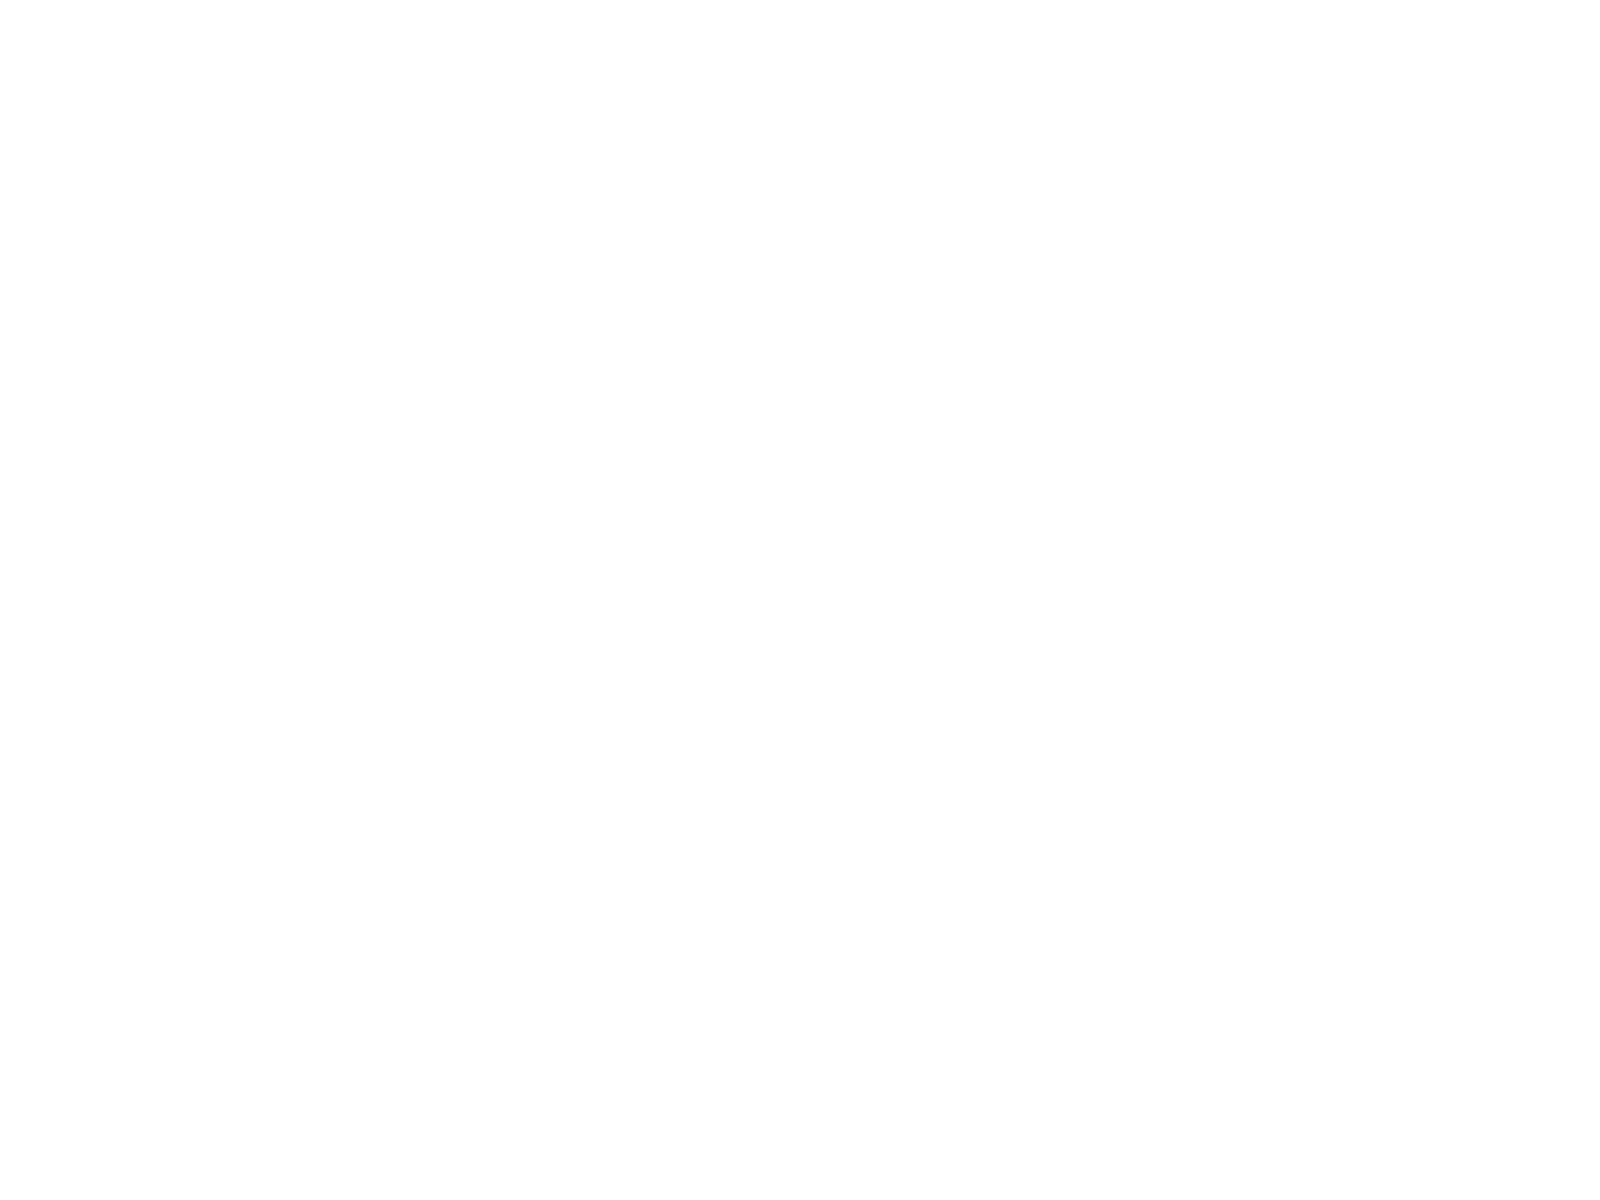

In [152]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

ax1.scatter(Di_hw29_x,Di_hw29_y,Di_hw29_z, facecolor='g')
ax1.scatter(Di_hw30_x,Di_hw30_y,Di_hw30_z, facecolor='g')
ax1.scatter(Gi5_hw29_x,Gi5_hw29_y,Gi5_hw29_z, facecolor='g')
ax1.scatter(Fi_hw29_x,Fi_hw29_y,Fi_hw29_z, facecolor='b')
ax1.scatter(Sb_hw29_x,Sb_hw29_y,Sb_hw29_z, facecolor='m')
ax1.scatter(Ma_fw29_x,Ma_fw29_y,Ma_fw29_z, facecolor='b')
ax1.scatter(Ma_fw37_x,Ma_fw37_y,Ma_fw37_z, facecolor='b')
ax1.scatter(Hu_fw37_x,Hu_fw37_y,Hu_fw37_z, facecolor='g')
ax1.scatter(Hu_fw29_x,Hu_fw29_y,Hu_fw29_z, facecolor='g')
ax1.scatter(Ka_fw29_x,Ka_fw29_y,Ka_fw29_z, facecolor='y')
ax1.scatter(Ka_hw29_x,Ka_hw29_y,Ka_hw29_z, facecolor='y')
ax1.scatter(ER_fw29_x,ER_fw29_y,ER_fw29_z, facecolor='m')
ax1.scatter(Er_hw29_x,Er_hw29_y,Er_hw29_z, facecolor='m')
ax1.scatter(Pr_hw30_x,Pr_hw30_y,Pr_hw30_z, facecolor='b')
ax1.scatter(Mg_hw29_x,Mg_hw29_y,Mg_hw29_z, facecolor='g')
ax1.scatter(Di_fw29_x,Di_fw29_y,Di_fw29_z, facecolor='g')
ax1.scatter(So_fw29_x,So_fw29_y,So_fw29_z, facecolor='y')
ax1.scatter(Gi5_fw29_x,Gi5_fw29_y,Gi5_fw29_z, facecolor='g')
ax1.scatter(Pr_fw29_x,Pr_fw29_y,Pr_fw29_z, facecolor='b')
ax1.scatter(Fi_fw29_x,Fi_fw29_y,Fi_fw29_z, facecolor='b')
ax1.scatter(Mg_fw29_x,Mg_fw29_y,Mg_fw29_z, facecolor='g')
ax1.scatter(Sb_fw29_x,Sb_fw29_y,Sb_fw29_z, facecolor='m')
ax1.scatter(Hu_hw29_x,Hu_hw29_y,Hu_hw29_z, facecolor='g')
ax1.scatter(La_fw29_x,La_fw29_y,La_fw29_z, facecolor='g')
ax1.scatter(Gu_fw37_x,Gu_fw37_y,Gu_fw37_z, facecolor='m')
ax1.scatter(Gufw29_x,Gufw29_y,Gufw29_z, facecolor='m')
ax1.scatter(Ma_hw29_x,Ma_hw29_y,Ma_hw29_z, facecolor='b')
ax1.scatter(Er_fw33_x,Er_fw33_y,Er_fw33_z, facecolor='m')
ax1.scatter(Ka_fw33_x,Ka_fw33_y,Ka_fw33_z, facecolor='y')
ax1.scatter(Fi_hw39_x,Fi_hw39_y,Fi_hw39_z, facecolor='b')
ax1.scatter(Gi5_hw30_x,Gi5_hw30_y,Gi5_hw30_z, facecolor='g')
ax1.scatter(So_hw29_x,So_hw29_y,So_hw29_z, facecolor='y')
ax1.scatter(So_hw30_x,So_hw30_y,So_hw30_z, facecolor='y')
ax1.scatter(Pr_hw29_x,Pr_hw29_y,Pr_hw29_z, facecolor='b')
ax1.scatter(Er_hw30_x,Er_hw30_y,Er_hw30_z, facecolor='m')
ax1.scatter(Zo8_fw29_x,Zo8_fw29_y,Zo8_fw29_z, facecolor='c')
ax1.scatter(Zo8_hw29_x,Zo8_hw29_y,Zo8_hw29_z, facecolor='c')
ax1.scatter(La_hw29_x,La_hw29_y,La_hw29_z, facecolor='g')
ax1.scatter(Gu_hw29_x,Gu_hw29_y,Gu_hw29_z, facecolor='m')
ax1.scatter(Ka_hw30_x,Ka_hw30_y,Ka_hw30_z, facecolor='y')
ax1.scatter(Hf_x,Hf_y,Hf_z, facecolor='c')
ax1.scatter(Wb_x,Wb_y,Wb_z, facecolor='y')

ax1.scatter(f29_x,f29_y,f29_z, facecolor='k')
ax1.scatter(f30_x,f30_y,f30_z, facecolor='k')
ax1.scatter(f33_x,f33_y,f33_z, facecolor='k')
ax1.scatter(f37_x,f37_y,f37_z, facecolor='k')
ax1.scatter(f39_x,f39_y,f39_z, facecolor='k')

#ax.scatter(f_x,f_y,f_z,c=np.linalg.norm([f_x,f_y,f_z], axis=0))
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 2 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)

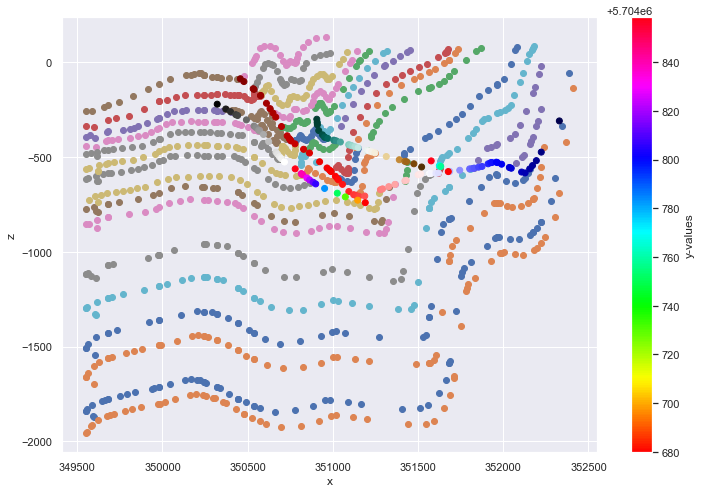

In [153]:
%matplotlib inline
im = plt.scatter(Di_hw29_x,Di_hw29_z) #,c=Di_hw29_y,cmap="gray")
im = plt.scatter(Di_hw30_x,Di_hw30_z) #,c=Di_hw30_y,cmap="gray")
im = plt.scatter(Gi5_hw29_x,Gi5_hw29_z) #,c=Gi5_hw29_y,cmap="gray")
im = plt.scatter(Fi_hw29_x,Fi_hw29_z)#,cmap="gray")
im = plt.scatter(Sb_hw29_x,Sb_hw29_z)#,cmap="gray")
im = plt.scatter(Ma_fw29_x,Ma_fw29_z)#,cmap="gray")
im = plt.scatter(Ma_fw37_x,Ma_fw37_z)#,cmap="gray")
im = plt.scatter(Hu_fw37_x,Hu_fw37_z)#,cmap="gray")
im = plt.scatter(Hu_fw29_x,Hu_fw29_z)#,cmap="gray")
im = plt.scatter(Ka_fw29_x,Ka_fw29_z)#,cmap="gray")
im = plt.scatter(Ka_hw29_x,Ka_hw29_z)#,cmap="gray")
im = plt.scatter(ER_fw29_x,ER_fw29_z)#,cmap="gray")
im = plt.scatter(Er_hw29_x,Er_hw29_z)#,cmap="gray")
im = plt.scatter(Pr_hw30_x,Pr_hw30_z)#,cmap="gray")
im = plt.scatter(Mg_hw29_x,Mg_hw29_z)#,cmap="gray")
im = plt.scatter(Di_fw29_x,Di_fw29_z)#,cmap="gray")
im = plt.scatter(So_fw29_x,So_fw29_z)#,cmap="gray")
im = plt.scatter(Gi5_fw29_x,Gi5_fw29_z)
im = plt.scatter(Pr_fw29_x,Pr_fw29_z)
im = plt.scatter(Fi_fw29_x,Fi_fw29_z)
im = plt.scatter(Mg_fw29_x,Mg_fw29_z)
im = plt.scatter(Sb_fw29_x,Sb_fw29_z)
im = plt.scatter(Hu_hw29_x,Hu_hw29_z)
im = plt.scatter(La_fw29_x,La_fw29_z)
im = plt.scatter(Gu_fw37_x,Gu_fw37_z)
im = plt.scatter(Gufw29_x,Gufw29_z)
im = plt.scatter(Ma_hw29_x,Ma_hw29_z)
im = plt.scatter(Er_fw33_x,Er_fw33_z)
im = plt.scatter(Ka_fw33_x,Ka_fw33_z)
im = plt.scatter(Fi_hw39_x,Fi_hw39_z)
im = plt.scatter(Gi5_hw30_x,Gi5_hw30_z)
im = plt.scatter(So_hw29_x,So_hw29_z)
im = plt.scatter(So_hw30_x,So_hw30_z)
im = plt.scatter(Pr_hw29_x,Pr_hw29_z)
im = plt.scatter(Er_hw30_x,Er_hw30_z)
im = plt.scatter(Zo8_fw29_x,Zo8_fw29_z)
im = plt.scatter(Zo8_hw29_x,Zo8_hw29_z)
im = plt.scatter(La_hw29_x,La_hw29_z)
im = plt.scatter(Gu_hw29_x,Gu_hw29_z)
im = plt.scatter(Ka_hw30_x,Ka_hw30_z)
im = plt.scatter(Hf_x,Hf_z) #,c=Hf_y,cmap="gray")
im = plt.scatter(Wb_x,Wb_z) #,c=Wb_y,cmap="gray")

im = plt.scatter(f29_x,f29_z,c=f29_y,cmap="seismic") #
im = plt.scatter(f30_x,f30_z,c=f30_y,cmap="BrBG")
im = plt.scatter(f37_x,f37_z,c=f37_y,cmap="gray_r")
im = plt.scatter(f33_x,f33_z,c=f33_y,cmap="hsv")
im = plt.scatter(f39_x,f39_z,c=f39_y,cmap="hsv")

#im = plt.scatter(f_x,f_z,c=f_y,cmap="viridis")
plt.colorbar(im, label="y-values")
plt.xlabel("x")
plt.ylabel("z");

fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 2 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size); 

Here we are going to work on fault number 29 from the 4 faults we have on the cross-section.

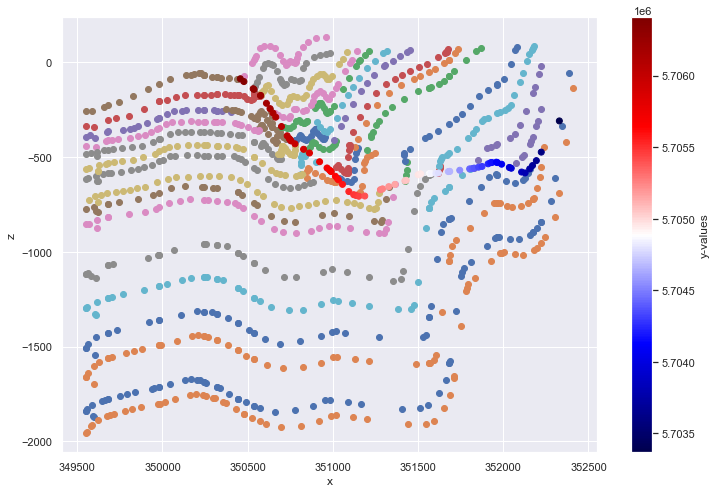

In [154]:
%matplotlib inline
im = plt.scatter(Di_hw29_x,Di_hw29_z) #,c=Di_hw29_y,cmap="gray")
im = plt.scatter(Di_hw30_x,Di_hw30_z) #,c=Di_hw30_y,cmap="gray")
im = plt.scatter(Gi5_hw29_x,Gi5_hw29_z) #,c=Gi5_hw29_y,cmap="gray")
im = plt.scatter(Fi_hw29_x,Fi_hw29_z)#,cmap="gray")
im = plt.scatter(Sb_hw29_x,Sb_hw29_z)#,cmap="gray")
im = plt.scatter(Ma_fw29_x,Ma_fw29_z)#,cmap="gray")
im = plt.scatter(Ma_fw37_x,Ma_fw37_z)#,cmap="gray")
im = plt.scatter(Hu_fw37_x,Hu_fw37_z)#,cmap="gray")
im = plt.scatter(Hu_fw29_x,Hu_fw29_z)#,cmap="gray")
im = plt.scatter(Ka_fw29_x,Ka_fw29_z)#,cmap="gray")
im = plt.scatter(Ka_hw29_x,Ka_hw29_z)#,cmap="gray")
im = plt.scatter(ER_fw29_x,ER_fw29_z)#,cmap="gray")
im = plt.scatter(Er_hw29_x,Er_hw29_z)#,cmap="gray")
im = plt.scatter(Pr_hw30_x,Pr_hw30_z)#,cmap="gray")
im = plt.scatter(Mg_hw29_x,Mg_hw29_z)#,cmap="gray")
im = plt.scatter(Di_fw29_x,Di_fw29_z)#,cmap="gray")
im = plt.scatter(So_fw29_x,So_fw29_z)#,cmap="gray")
im = plt.scatter(Gi5_fw29_x,Gi5_fw29_z)
im = plt.scatter(Pr_fw29_x,Pr_fw29_z)
im = plt.scatter(Fi_fw29_x,Fi_fw29_z)
im = plt.scatter(Mg_fw29_x,Mg_fw29_z)
im = plt.scatter(Sb_fw29_x,Sb_fw29_z)
im = plt.scatter(Hu_hw29_x,Hu_hw29_z)
im = plt.scatter(La_fw29_x,La_fw29_z)
im = plt.scatter(Gu_fw37_x,Gu_fw37_z)
im = plt.scatter(Gufw29_x,Gufw29_z)
im = plt.scatter(Ma_hw29_x,Ma_hw29_z)
im = plt.scatter(Er_fw33_x,Er_fw33_z)
im = plt.scatter(Ka_fw33_x,Ka_fw33_z)
im = plt.scatter(Fi_hw39_x,Fi_hw39_z)
im = plt.scatter(Gi5_hw30_x,Gi5_hw30_z)
im = plt.scatter(So_hw29_x,So_hw29_z)
im = plt.scatter(So_hw30_x,So_hw30_z)
im = plt.scatter(Pr_hw29_x,Pr_hw29_z)
im = plt.scatter(Er_hw30_x,Er_hw30_z)
im = plt.scatter(Zo8_fw29_x,Zo8_fw29_z)
im = plt.scatter(Zo8_hw29_x,Zo8_hw29_z)
im = plt.scatter(La_hw29_x,La_hw29_z)
im = plt.scatter(Gu_hw29_x,Gu_hw29_z)
im = plt.scatter(Ka_hw30_x,Ka_hw30_z)
im = plt.scatter(Hf_x,Hf_z) #,c=Hf_y,cmap="gray")
im = plt.scatter(Wb_x,Wb_z) #,c=Wb_y,cmap="gray")

im = plt.scatter(f29_x,f29_z,c=f29_y,cmap="seismic") #
# im = plt.scatter(f30_x,f30_z,c=f30_y,cmap="BrBG")
# im = plt.scatter(f37_x,f37_z,c=f37_y,cmap="gray_r")
# im = plt.scatter(f33_x,f33_z,c=f33_y,cmap="hsv")
# im = plt.scatter(f39_x,f39_z,c=f39_y,cmap="hsv")

#im = plt.scatter(f_x,f_z,c=f_y,cmap="viridis")
plt.colorbar(im, label="y-values")
plt.xlabel("x")
plt.ylabel("z");

fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 2 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size); 

### 3. Displacement, Heave and Throw calculation

#### Calculating the offests 

Calculating the heave, throw and displacement by creating functions. For example, the heave is the horizontal gap or overlap between the hanging wall “upthrown” and footwall “downthrown”, here we index the hanging wall and footwall in the “x” direction to get the first and last points. Second, we calculate the throw by getting the first and last points in the “z” direction. Finally, we calculate the displacement by using the right angle triangle equations.

![](https://i.imgur.com/LtzNtni.png)

In [155]:
def heave(hw_x, fw_x):
    heave_x = hw_x[0] - fw_x[-1]
    
    return heave_x

In [156]:
def throw(hw_z, fw_z):
    throw_z = hw_z[0] - fw_z[-1]
    
    return throw_z

In [157]:
def displacement(heave, throw):
    disp = math.sqrt((np.abs(heave)**2) + (np.abs(throw)**2))
    
    return disp  

#### Offsets of horizon "La"

In [158]:
Heave_y_La = heave(La_hw29_x, La_fw29_x)
throw_z_La = throw(La_hw29_z, La_fw29_z)
disp_z_La = displacement(Heave_y_La, throw_z_La)

print('Heave :', round(Heave_y_La))
print('Throw :', round(throw_z_La))
print('Displacement :', round(disp_z_La))

Heave : -38
Throw : 32
Displacement : 50


#### Offsets of horizon "Gu"

In [159]:
Heave_y_Gu = heave(Gu_hw29_x, Gufw29_x)
throw_z_Gu = throw(Gu_hw29_z, Gufw29_z)
disp_z_Gu = displacement(Heave_y_Gu, throw_z_Gu)

print('Heave :', round(Heave_y_Gu))
print('Throw :', round(throw_z_Gu))
print('Displacement :', round(disp_z_Gu))

Heave : 204
Throw : 71
Displacement : 216


#### Offsets of horizon "Ma"

In [160]:
Heave_y_Ma = heave(Ma_hw29_x, Ma_fw29_x)
throw_z_Ma = throw(Ma_hw29_z, Ma_fw29_z)
disp_z_Ma = displacement(Heave_y_Ma, throw_z_Ma)

print('Heave :', round(Heave_y_Ma))
print('Throw :', round(throw_z_Ma))
print('Displacement :', round(disp_z_Ma))

Heave : 579
Throw : 416
Displacement : 713


#### Offsets of horizon "Hu"

In [161]:
Heave_x_Hu = heave(Hu_hw29_x, Hu_fw29_x)
throw_z_Hu = throw(Hu_hw29_z, Hu_fw29_z)
disp_z_Hu = displacement(Heave_x_Hu, throw_z_Hu)

print('Heave :', round(Heave_x_Hu))
print('Throw :', round(throw_z_Hu))
print('Displacement :', round(disp_z_Hu))

Heave : 435
Throw : 490
Displacement : 655


#### Offsets of horizon "Ka"

In [162]:
Heave_y_Ka = heave(Ka_hw29_x, Ka_fw29_x)
throw_z_Ka = throw(Ka_hw29_z, Ka_fw29_z)
disp_z_Ka = displacement(Heave_y_Ka, throw_z_Ka)

print('Heave :', round(Heave_y_Ka))
print('Throw :', round(throw_z_Ka))
print('Displacement :', round(disp_z_Ka))

Heave : -65
Throw : 178
Displacement : 189


Note that the heave is negative value which mean that the heave is overlap not a gap.

#### Offsets of horizon "Er"

In [163]:
Heave_y_Er = heave(ER_fw29_x, ER_fw29_x)
throw_z_Er = throw(Er_hw29_z, ER_fw29_z)
disp_z_Er = displacement(Heave_y_Er, throw_z_Er)

print('Heave :', round(Heave_y_Er))
print('Throw :', round(throw_z_Er))
print('Displacement :', round(disp_z_Er))

Heave : -180
Throw : 155
Displacement : 238


#### Offsets of horizon "Pr"

In [164]:
Heave_y_Pr = heave(Pr_hw29_x, Pr_fw29_x)
throw_z_Pr = throw(Pr_hw29_z, Pr_fw29_z)
disp_z_Pr = displacement(Heave_y_Pr, throw_z_Pr)

print('Heave :', round(Heave_y_Pr))
print('Throw :', round(throw_z_Pr))
print('Displacement :', round(disp_z_Pr))

Heave : -291
Throw : 96
Displacement : 306


#### Offsets of horizon "Di"

In [165]:
Heave_y_Di = heave(Di_hw29_x, Di_fw29_x)
throw_z_Di = throw(Di_hw29_z, Di_fw29_z)
disp_z_Di = displacement(Heave_y_Di, throw_z_Di)

print('Heave :', round(Heave_y_Di))
print('Throw :', round(throw_z_Di))
print('Displacement :', round(disp_z_Di))

Heave : -295
Throw : 36
Displacement : 297


#### Offsets of horizon "So"

In [166]:
Heave_y_So = heave(So_hw29_x, So_fw29_x)
throw_z_So = throw(So_hw29_z, So_fw29_z)
disp_z_So = displacement(Heave_y_So, throw_z_So)

print('Heave :', round(Heave_y_So))
print('Throw :', round(throw_z_So))
print('Displacement :', round(disp_z_So))

Heave : -117
Throw : 166
Displacement : 204


#### Offsets of horizon "Gi5"

In [167]:
Heave_y_Gi5 = heave(Gi5_hw29_x, Gi5_fw29_x)
throw_z_Gi5 = throw(Gi5_hw29_z, Gi5_fw29_z)
disp_z_Gi5 = displacement(Heave_y_Gi5, throw_z_Gi5)

print('Heave :', round(Heave_y_Gi5))
print('Throw :', round(throw_z_Gi5))
print('Displacement :', round(disp_z_Gi5))

Heave : -144
Throw : 62
Displacement : 157


#### Offsets of horizon "Fi"

In [168]:
Heave_y_Fi = heave(Fi_hw29_x, Fi_fw29_x)
throw_z_Fi = throw(Fi_hw29_z, Fi_fw29_z)
disp_z_Fi = displacement(Heave_y_Fi, throw_z_Fi)

print('Heave :', round(Heave_y_Fi))
print('Throw :', round(throw_z_Fi))
print('Displacement :', round(disp_z_Fi))

Heave : -183
Throw : -22
Displacement : 184


#### Offsets of horizon "Mg"

In [169]:
Heave_y_Mg = heave(Mg_hw29_x, Mg_fw29_x)
throw_z_Mg = throw(Mg_hw29_z, Mg_fw29_z)
disp_z_Mg = displacement(Heave_y_Mg, throw_z_Mg)

print('Heave :', round(Heave_y_Mg))
print('Throw :', round(throw_z_Mg))
print('Displacement :', round(disp_z_Mg))

Heave : -325
Throw : 4
Displacement : 325


#### Offsets of horizon "Sb"

In [170]:
Heave_y_Sb = heave(Sb_hw29_x, Sb_fw29_x)
throw_z_Sb = throw(Sb_hw29_z, Sb_fw29_z)
disp_z_Sb = displacement(Heave_y_Sb, throw_z_Sb)

print('Heave :', round(Heave_y_Sb))
print('Throw :', round(throw_z_Sb))
print('Displacement :', round(disp_z_Sb))

Heave : -206
Throw : -110
Displacement : 233


#### Offsets of horizon "So"

In [171]:
Heave_y_So = heave(So_hw29_x, So_fw29_x)
throw_z_So = throw(So_hw29_z, So_fw29_z)
disp_z_So = displacement(Heave_y_So, throw_z_So)

print('Heave :', round(Heave_y_So))
print('Throw :', round(throw_z_So))
print('Displacement :', round(disp_z_So))

Heave : -117
Throw : 166
Displacement : 204


### 4. Distance calculation

Moreover, we calculate the distance from a reference point “RP” to the point adjust the fault on the hanging wall in the "y" direction. Then we apply this on all the horizons in the cross-section.

In [172]:
RP = f29_y[-1]
RP

5703368.2079

In [173]:
dist_La = np.abs((RP) - (La_hw29_y[0]))
dist_Gu = np.abs((RP) - (Gu_hw29_y[0]))
dist_Ma = np.abs((RP) - (Ma_hw29_y[-1]))
dist_Hu = np.abs((RP) - (Hu_hw29_y[-1]))
dist_Ka = np.abs((RP) - (Ka_hw29_y[0]))
dist_Er = np.abs((RP) - (Er_hw29_y[0]))
dist_Pr = np.abs((RP) - (Pr_hw29_y[0]))
dist_Di = np.abs((RP) - (Di_hw29_y[0]))
dist_So = np.abs((RP) - (So_hw29_y[-1]))
dist_Gi5 = np.abs((RP) - (Gi5_hw29_y[-1]))
dist_Fi = np.abs((RP) - (Fi_hw29_y[0]))
dist_Mg = np.abs((RP) - (Mg_hw29_y[0]))
dist_Sb = np.abs((RP) - (Sb_hw29_y[0]))

Let us check the values of Sb and La horizons.

In [174]:
dist_Sb

611.197100000456

In [175]:
dist_La

2932.7982000000775

### 5. Plotting the displacement distance profiles 

In order to plot the displacement distance profiles, we need to set a few user-defined parameters such as setting the upper and lower tips to zero and storing data points in a list.

In [176]:
upper_tip = 0
lower_tip = 0
fault_dist = np.abs((RP) -(f29_y[0]))

In [177]:
fault_dist

3038.5887000001967

In [178]:
dist_f29 = [fault_dist,
    dist_La ,
    dist_Gu ,
    dist_Ma ,
    dist_Hu ,
    dist_Ka ,
    dist_Er ,
    dist_Pr ,
    dist_Di ,
    dist_So ,
    dist_Gi5 ,
    dist_Fi ,
    dist_Mg ,
    dist_Sb,
    upper_tip]

In [179]:
disp_fault = [upper_tip,
    disp_z_La ,
    disp_z_Gu ,
    disp_z_Ma ,
    disp_z_Hu ,
    disp_z_Ka ,
    disp_z_Er ,
    disp_z_Pr ,
    disp_z_Di ,
    disp_z_So ,
    disp_z_Gi5 ,
    disp_z_Fi ,
    disp_z_Mg ,
    disp_z_Sb,
    lower_tip]

In [180]:
disp_fault

[0,
 49.57985670864215,
 216.27952541286197,
 712.967016880551,
 654.9954302058716,
 189.07869181126108,
 237.55792788676962,
 306.4599377063059,
 296.91229262250897,
 203.6780927302792,
 156.53848271769982,
 184.25066051838544,
 325.3943123485531,
 233.24343562057751,
 0]

Finally, we visualised the displacement distance plots.

<IPython.core.display.Javascript object>


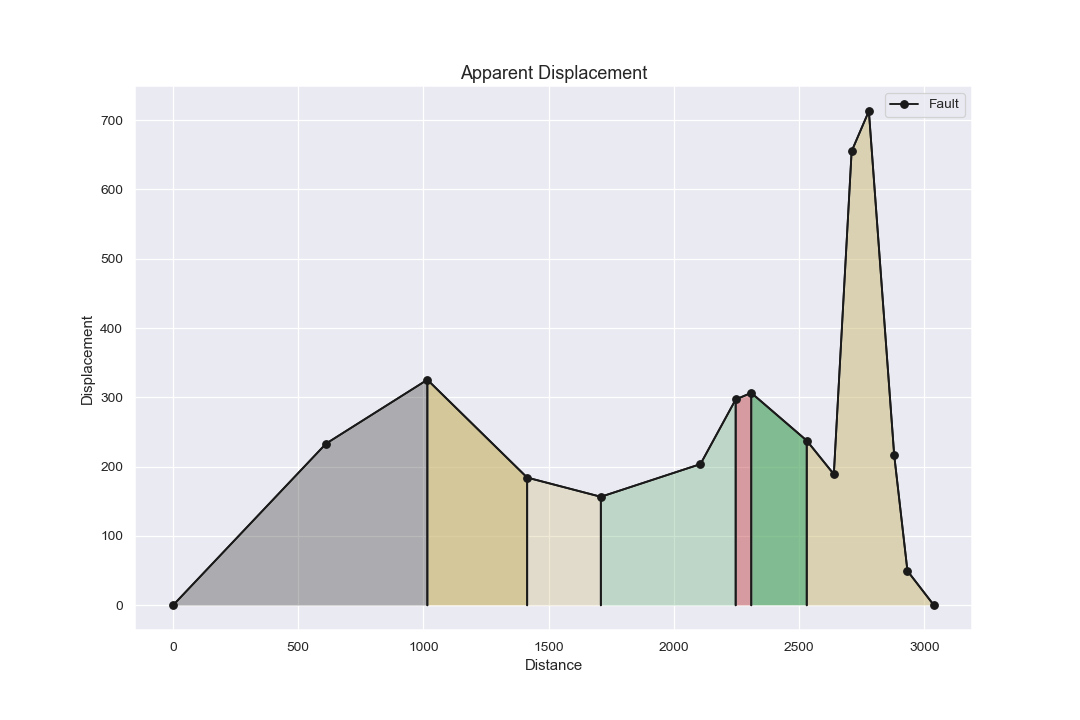

In [181]:
%matplotlib notebook

x = dist_f29
y = disp_fault
ax2 = plt.axes()
ax2.plot(x, y, '-ok', label='Fault')


a = [0,dist_Sb,dist_Mg, dist_Mg]
b = [0,disp_z_Sb,disp_z_Mg,0]
c = [dist_Mg,dist_Mg, dist_Fi,dist_Fi]
d = [0,disp_z_Mg,disp_z_Fi,0]
e = [dist_Fi,dist_Fi,dist_Gi5,dist_Gi5]
f = [0,disp_z_Fi,disp_z_Gi5,0]
g = [dist_Gi5,dist_Gi5,dist_So,dist_Di,dist_Di]
h = [0,disp_z_Gi5,disp_z_So,disp_z_Di,0]
i = [dist_Di,dist_Di,dist_Pr,dist_Pr]
j = [0,disp_z_Di,disp_z_Pr,0]
k = [dist_Pr,dist_Pr,dist_Er,dist_Er]
l = [0,disp_z_Pr,disp_z_Er,0]
m = [dist_Er,dist_Er,dist_Ka,dist_Hu,dist_Ma,dist_Gu,dist_La,fault_dist]
n = [0,disp_z_Er,disp_z_Ka,disp_z_Hu,disp_z_Ma,disp_z_Gu,disp_z_La,0]

ax2.plot(a, b, '-k')
ax2.plot(c, d, '-k')
ax2.plot(e, f, '-k')
ax2.plot(g, h, '-k')
ax2.plot(i, j, '-k')
ax2.plot(k, l, '-k')
ax2.plot(m, n, '-k')

ax2.fill_between(a, b, facecolor='k', alpha=0.3)
ax2.fill_between(c, d, facecolor='y', alpha=0.7)
ax2.fill_between(e, f, facecolor='y', alpha=0.3)
ax2.fill_between(g, h, facecolor='g', alpha=0.3)
ax2.fill_between(i, j, facecolor='r', alpha=0.5)
ax2.fill_between(k, l, facecolor='g', alpha=0.7)
ax2.fill_between(m, n, facecolor='y', alpha=0.5)


leg = ax2.legend()
style.use('ggplot')

plt.xlabel('Distance')
plt.ylabel('Displacement')
plt.title('Apparent Displacement')
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 2 #Set a zoom factor
#Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size) 

## Conclusions

1. We create a Python script to calculate the displacement and distance along the faults from 2D cross-sections.

2. The script plots the displacement–distance profiles automatically and colours the background of the profiles with the rock formations. 

3. Moreover, the model will plot an error envelope reference to the uncertainty nomenclature of the horizons and faults inherited in the interpreted cross-sections from Drozdzewski et al. (1980).

4. Additionally, the algorithm will suggest a smooth displacement–distance curve as a semi-circular line between faults tips where it acts as a baseline to quantify the displacement–distance variations.

5. This model allows researchers to produce displacement–distance profiles quickly, incorporate the mechanical stratigraphy information, and increase the interpretation accuracy by a realistic distribution of the displacement across the length of the faults.

![](https://i.imgur.com/zYZO8TF.png)

***Thank you!***